In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from wordcloud import WordCloud


In [2]:
# Load the dataset
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv(r"C:\Users\91938\Downloads\sentiment tweet dataset.zip", encoding='ISO-8859-1', names=columns)
df.head()

target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

# Data Preprocessing

In [3]:
# Drop unnecessary columns
df.drop(columns=['ids', 'date', 'flag', 'user'], inplace=True)

In [4]:
# Replace target labels (4 -> 1)
df['target'] = df['target'].replace(4, 1)

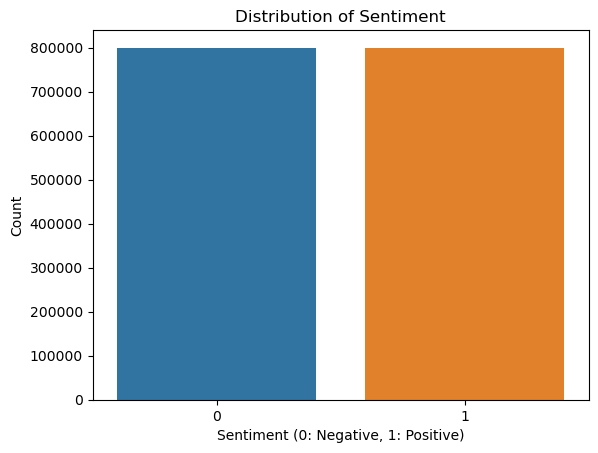

In [5]:
# Visualize the distribution of sentiment
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [6]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove multiple spaces
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stop words
    return text

# Apply the cleaning function to the text column
df['text'] = df['text'].apply(clean_text)

# Word Cloud Visualization

In [7]:
# Generate positive and negative word clouds
positive_tweets = df[df['target'] == 1]['text']
negative_tweets = df[df['target'] == 0]['text']

all_positive_text = ' '.join(positive_tweets)
all_negative_text = ' '.join(negative_tweets)

positive_wordcloud = WordCloud(width=1600, height=800, collocations=False, max_words=1000).generate(all_positive_text)
negative_wordcloud = WordCloud(width=1600, height=800, collocations=False, max_words=1000).generate(all_negative_text)

In [8]:
# Plot positive word cloud
plt.figure(figsize=(20, 20))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.tight_layout()
plt.show()

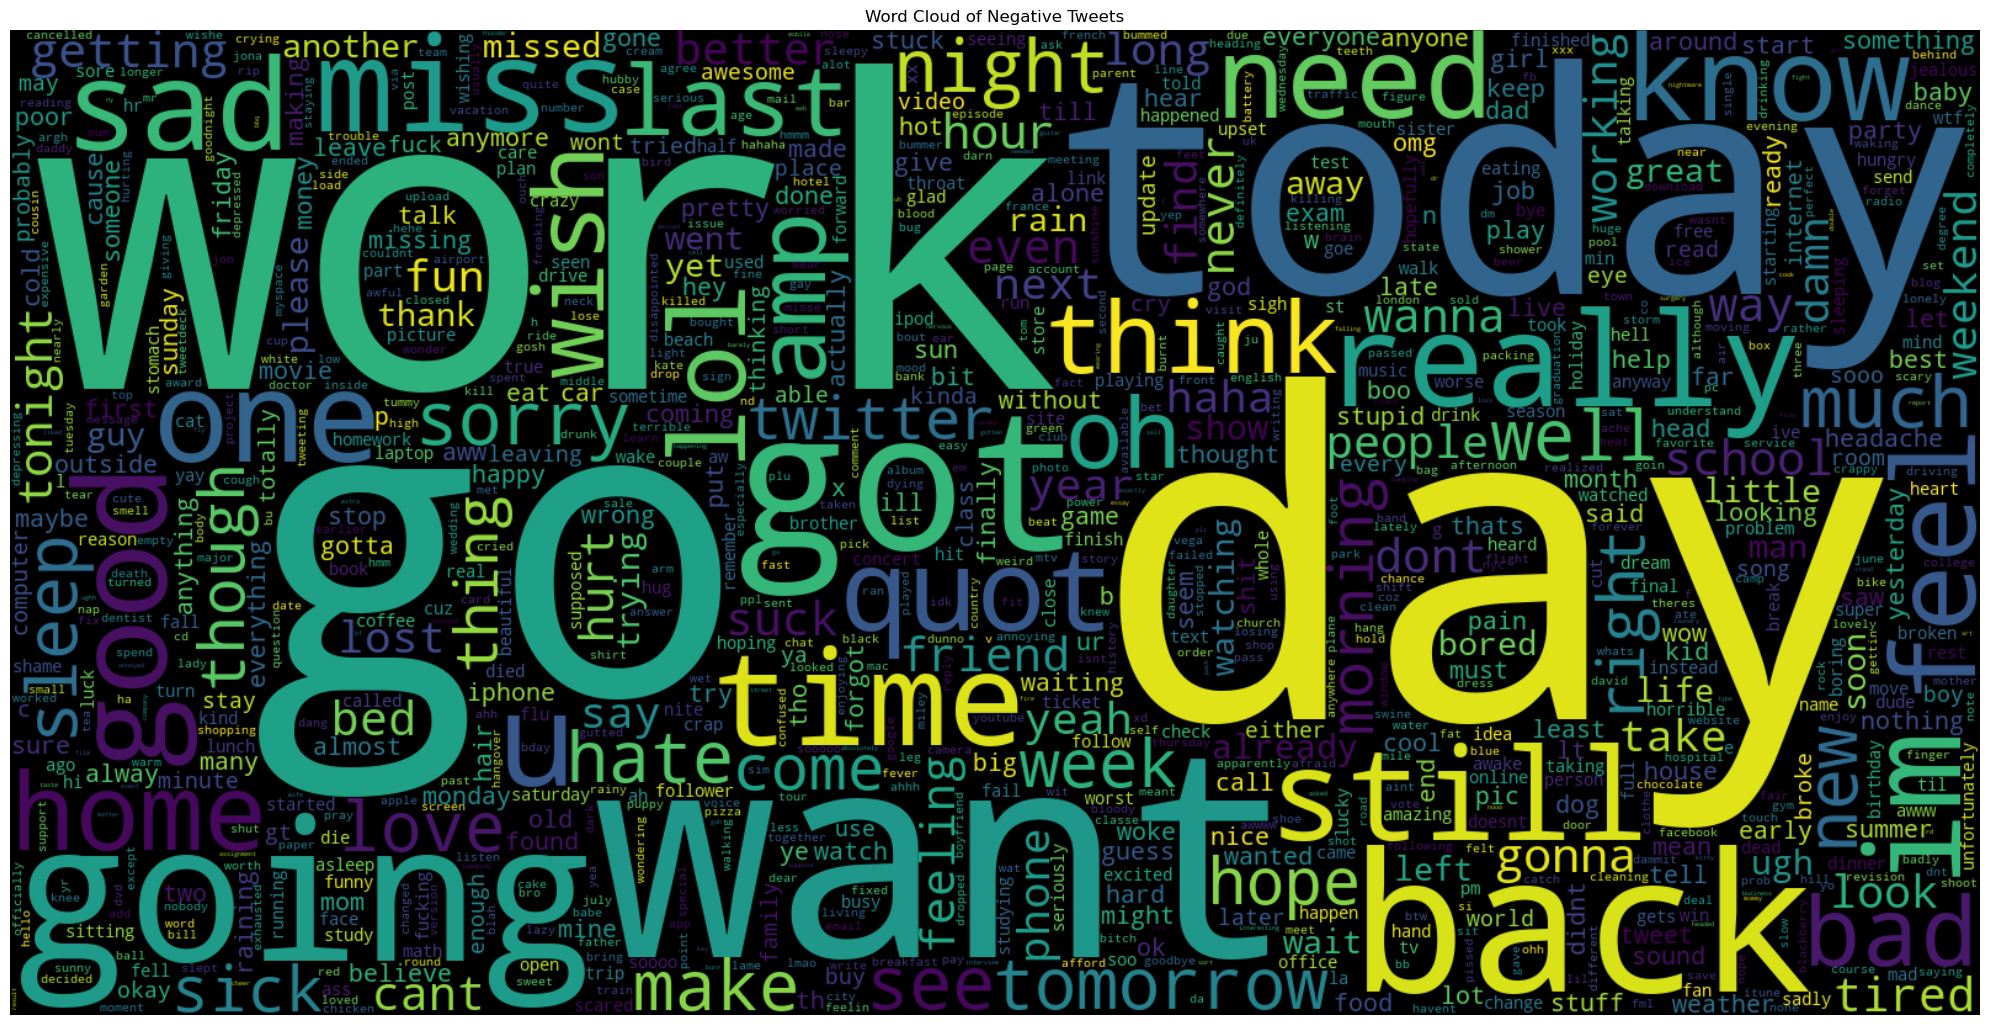

In [9]:
# Plot negative word cloud
plt.figure(figsize=(20, 20))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.tight_layout()
plt.show()

# Model Training

In [10]:
# Prepare features and target variable
X = df.text
y = df.target

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [13]:
# Train the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [14]:
# Make predictions
train_prediction = naive_bayes.predict(X_train_tfidf)
test_prediction = naive_bayes.predict(X_test_tfidf)

In [15]:
# Evaluate the model
print("Training Set")
print(confusion_matrix(y_train, train_prediction))
print(classification_report(y_train, train_prediction))

Training Set
[[515706 124531]
 [137001 502762]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80    640237
           1       0.80      0.79      0.79    639763

    accuracy                           0.80   1280000
   macro avg       0.80      0.80      0.80   1280000
weighted avg       0.80      0.80      0.80   1280000



In [16]:
print("Test Set")
print(confusion_matrix(y_test, test_prediction))
print(classification_report(y_test, test_prediction))

Test Set
[[123525  36238]
 [ 40199 120038]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159763
           1       0.77      0.75      0.76    160237

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



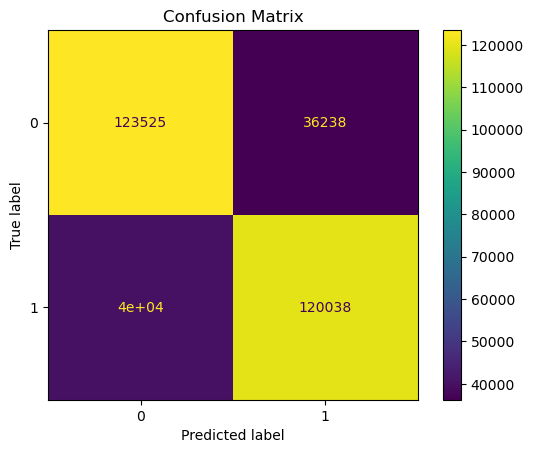

In [17]:
# Plot confusion matrix
cm = confusion_matrix(y_test, test_prediction)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.title('Confusion Matrix')
plt.show()

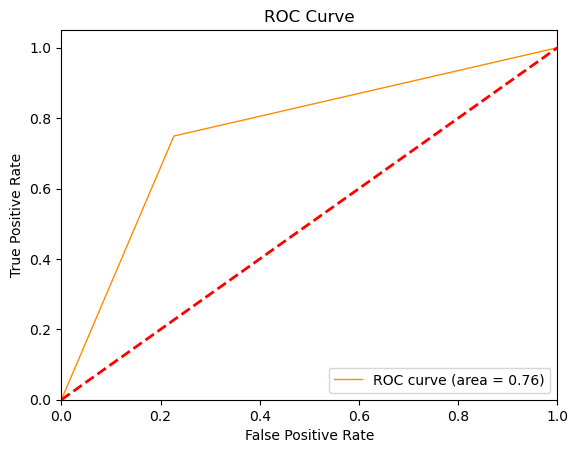

In [18]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,test_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
#generate positive and negative word cloud

positive_tweets = df[df['target'] == 1]['text']
negative_tweets = df[df['target'] == 0]['text']

all_positive_text = ' '.join(positive_tweets)
all_negative_text = ' '.join(negative_tweets)

positive_wordcloud = WordCloud(width=1600, height=800,collocations=False, max_words=1000).generate(all_positive_text)
negative_wordcloud = WordCloud(width=1600, height=800, collocations=False, max_words=1000).generate(all_negative_text)


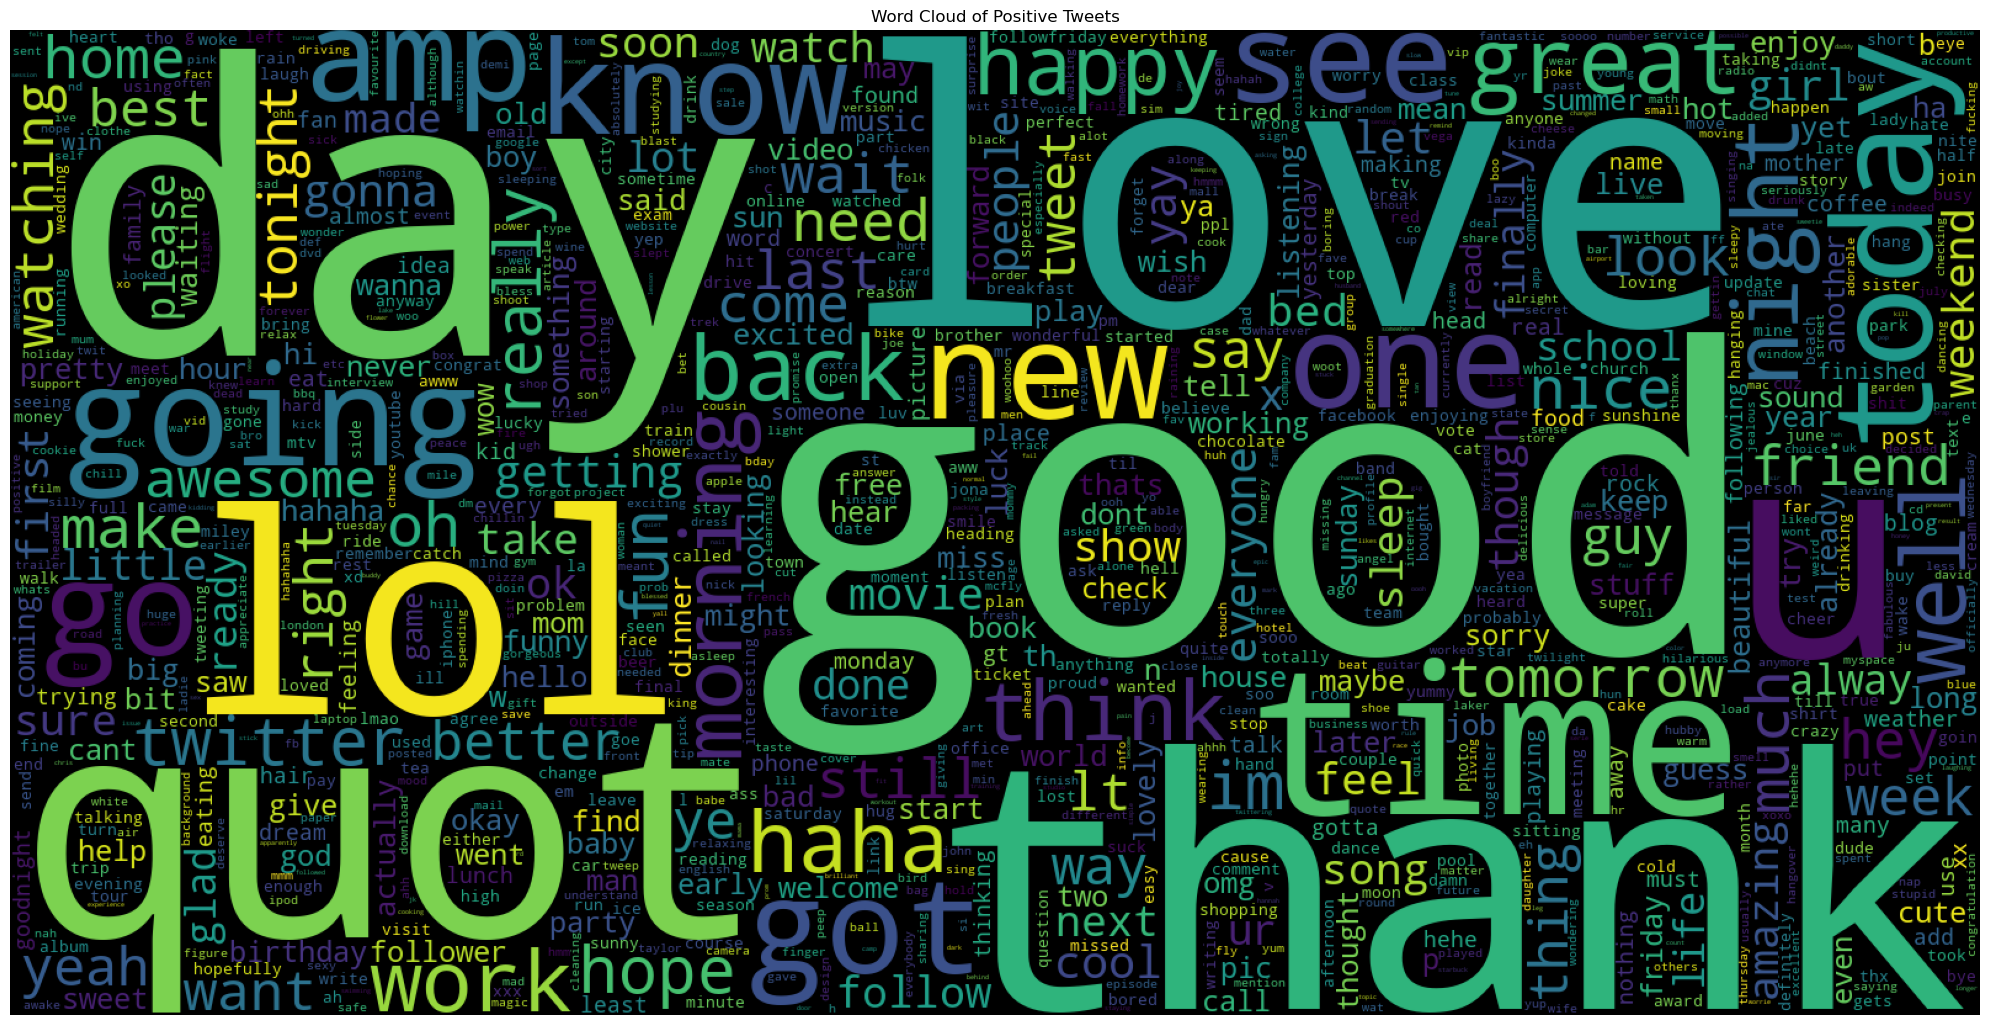

In [20]:
#plot for positive word cloud
plt.figure(figsize=(20,20))
plt.imshow(positive_wordcloud)
plt.axis('off')  
plt.title('Word Cloud of Positive Tweets')
plt.tight_layout() 
plt.show()

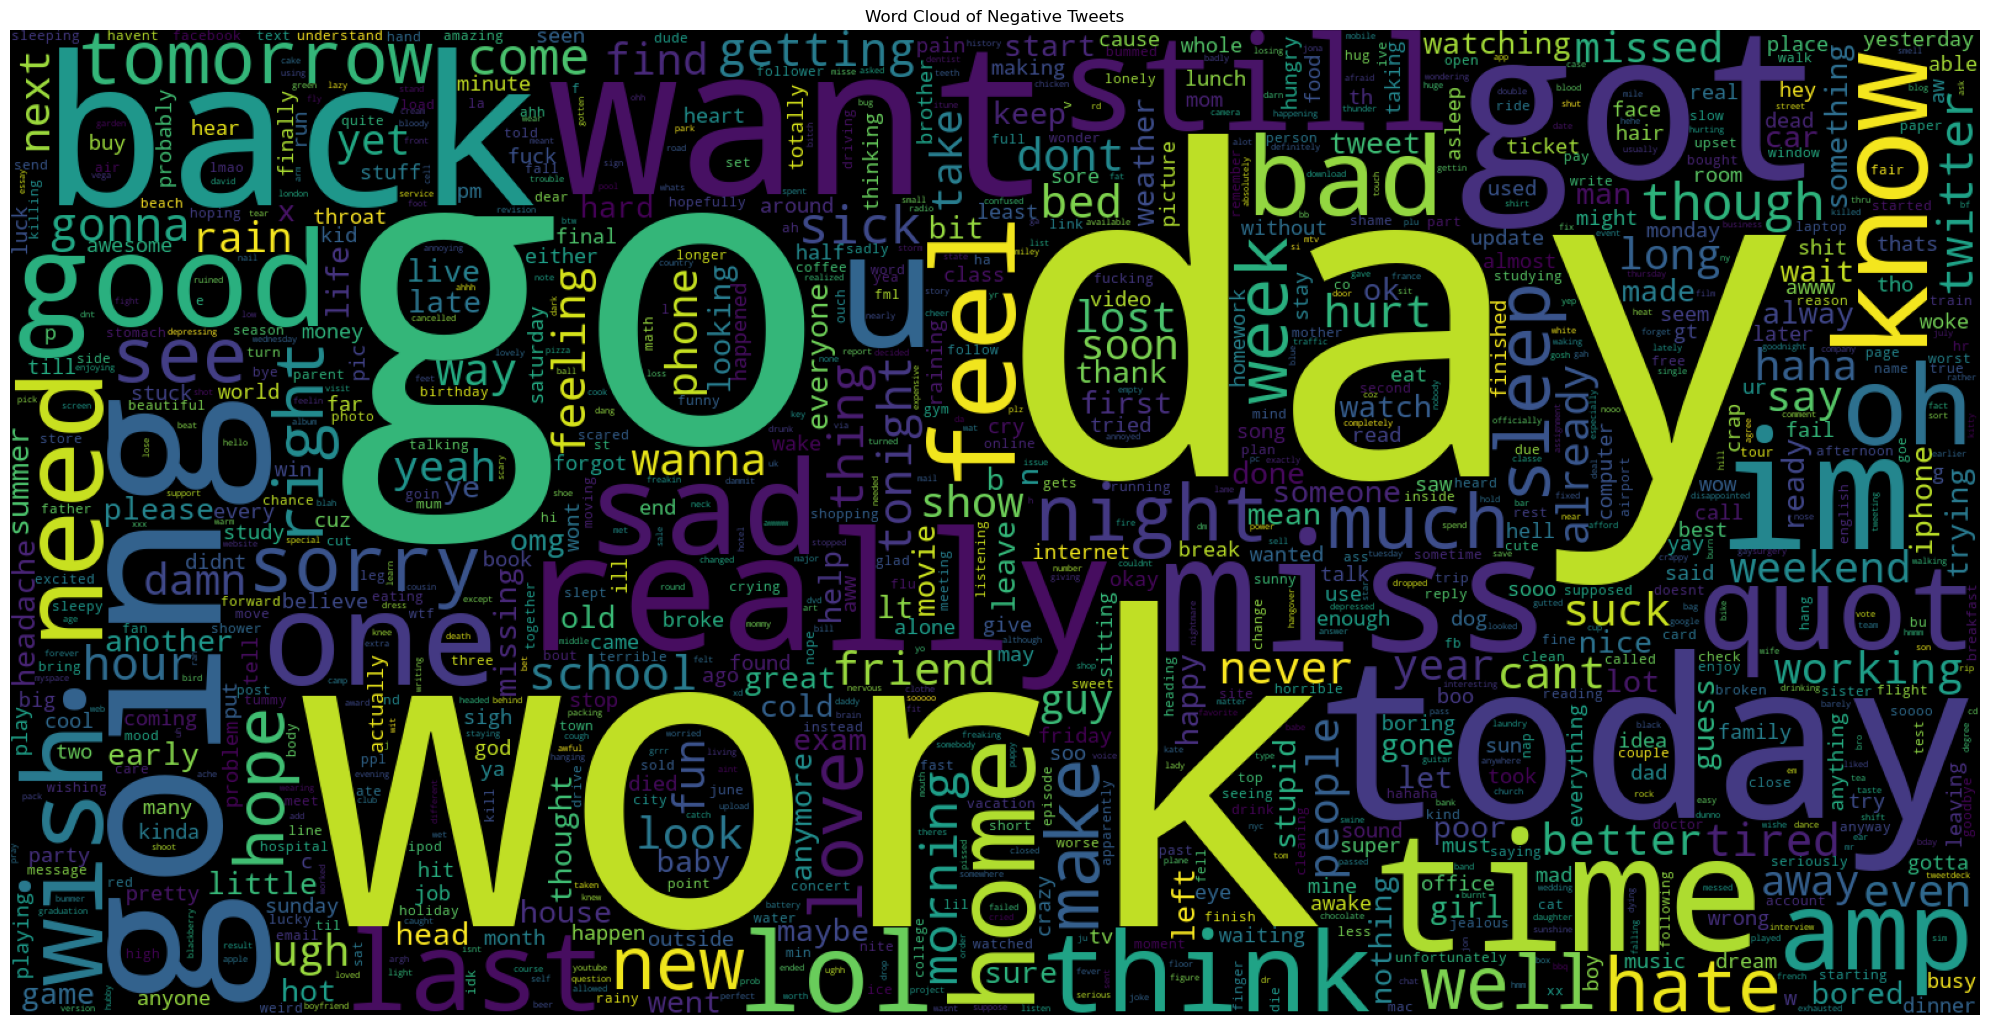

In [21]:
#plot for negative word cloud
plt.figure(figsize=(20,20))

plt.imshow(negative_wordcloud)
plt.axis('off')  
plt.title('Word Cloud of Negative Tweets')
plt.tight_layout()  #
plt.show()